# Clustering of Countries 

The main steps involved in the process are as follows:

1. Data Understanding and Cleaning
2. Data Preparation
3. Modelling

In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# 1. Data Understanding

In [3]:
# Reading the dataset
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


We will convert imports,exports and health spending from percentage values to actual values of their GDP per capita. As we can see that the percentage values don't give a clear picture of that country.

For example, afghanistan and albania have similar imports percentange but their gdpp has a huge gap which doesn't give an accurate idea of which country is more developed than the other.

In [4]:
# Converting exports,imports and health spending percentages to absolute values.
data['exports'] = data['exports']*data['gdpp']/100
data['imports'] = data['imports']*data['gdpp']/100
data['health'] = data['health']*data['gdpp']/100

In [6]:
# printing the dataset after converting to absolute values
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [7]:
# printing the shape of the dataset
data.shape

(167, 10)

In [8]:
# checking the datatypes of various columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [9]:
# checking for null values in the dataset
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# 2. Data Preparation

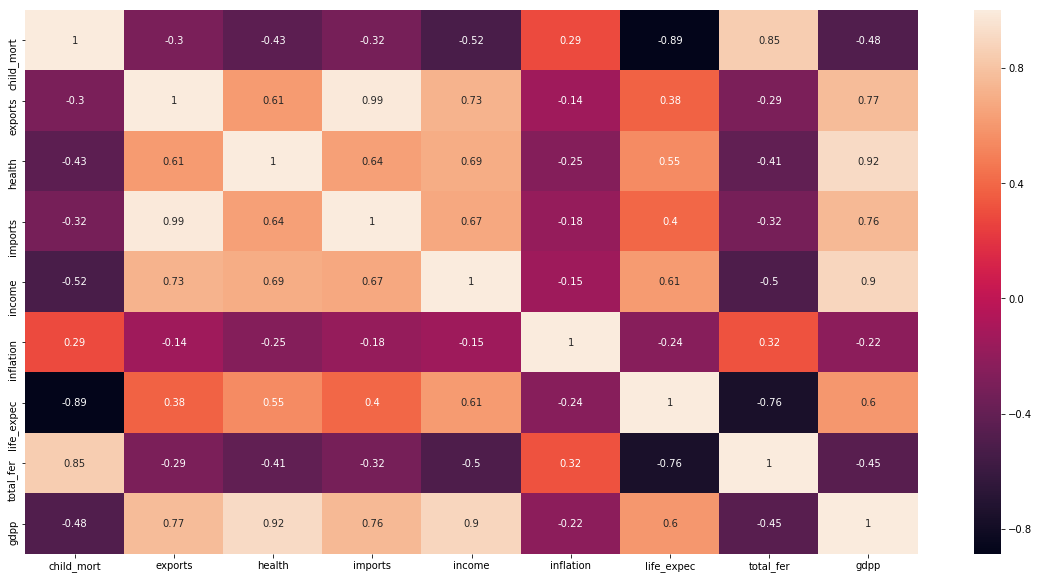

In [10]:
# Teh entire dataset is nearly clean,but we have a lot of variables and making and visualising proper clusters will be a difficult task
# Let's apply PCA to do dimensionality reduction
# Let's plot the correlation matrix and check if the data is highly correlated (the basic requirement of PCA)
plt.figure(figsize = (20,10))        
sns.heatmap(data.corr(),annot = True)

A lot of highly correlated variables exist, hence the usage of PCA is justified.

In [12]:
#The final matrix would only contain the data columns. Hence let's drop the country column
data_final = data.drop(['country'],axis=1)
data_final.head()  

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [13]:
# There is a lot of the data variables which are of different orders of magnitude.We will do rescaling so that PCA can be applied
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data2 = standard_scaler.fit_transform(data_final)

C:\Users\Yuthika\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Yuthika\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
data2

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [15]:
# Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [16]:
#Applying PCA
pca.fit(data2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [17]:
#List of PCA components.It should be the same as the number of variables
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [18]:
# Checking the variance ratios
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

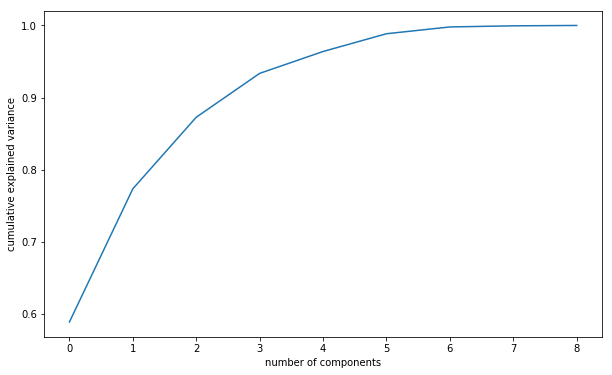

In [21]:
#Plotting the scree plot
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We observe that over 90% of the data is properly explained by the first 3 principal components. Let's use them for our clustering process

In [22]:
# Checking the first three components
colnames = list(data.drop('country',axis=1).columns)
pca_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pca_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


Let's plot them to get a better idea about which variables are well explained by these 3 components. We'll use only the first 2 PCs here and check their variance.

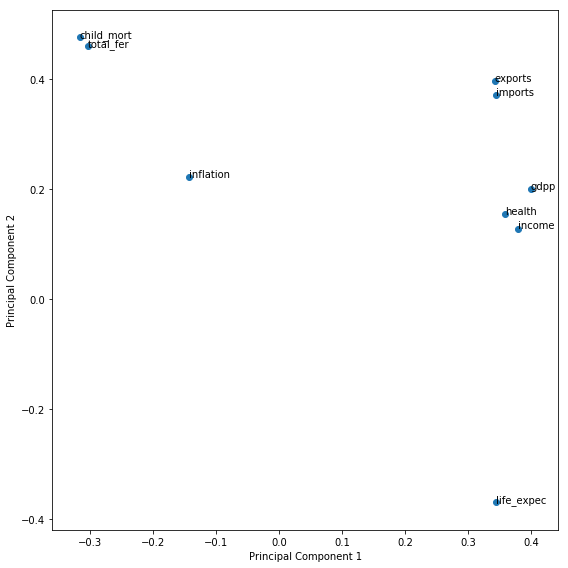

In [23]:
# Visualising the first 2 components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

A lot of variables have a good loading score on the first principal component. Similarly Child mortality and total fertility is well explained by the 2nd prinicpal component.

In [24]:
# We are achieving 90% variance with 3 principal components. Considering the data until that many components
# We will use incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [25]:
# Projecting the original data on the 3 principal components
df_train_pca = pca_final.fit_transform(data2)
df_train_pca.shape

(167, 3)

In [26]:
#take the transpose of the Principal Components matrix so that we can create the new matrix
pc = np.transpose(df_train_pca)
pc

array([[-2.63744157e+00, -2.22769569e-02, -4.57626261e-01,
        -2.72452030e+00,  6.49848516e-01,  3.71968554e-02,
        -3.32691520e-01,  3.18036154e+00,  3.81568156e+00,
        -4.67515152e-01,  1.49875246e+00,  1.47097104e+00,
        -1.01419903e+00,  8.45238116e-01, -1.34473920e-02,
         3.96087770e+00, -4.02707071e-01, -2.36598657e+00,
        -7.14998191e-01, -1.01778054e+00,  2.52812687e-01,
        -1.13095912e+00,  1.66280202e-01,  2.69525065e+00,
         2.80569006e-01, -2.75387449e+00, -2.76406823e+00,
        -1.17929406e+00, -2.44142939e+00,  3.39411994e+00,
        -5.23229456e-01, -3.24153046e+00, -3.18889212e+00,
         6.92394286e-01, -1.28851026e-01, -1.38822916e-02,
        -1.94991207e+00, -3.11679859e+00, -2.04776384e+00,
         4.31523541e-01, -2.57476033e+00,  8.46278142e-01,
         2.31379384e+00,  1.67463303e+00,  4.37600084e+00,
        -3.67788028e-01, -3.02658561e-01, -8.36646810e-01,
        -3.36572123e-01, -1.05577406e+00, -1.94848965e+0

In [27]:
# Creating the new matrix according to the given principal components
rownames = list(data['country'])
pca_df2 = pd.DataFrame({'country':rownames,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})
pca_df2.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


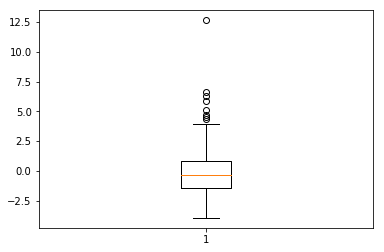

In [29]:
# Performing the outlier analysis before proceeding to clustering
plt.boxplot(pca_df2.PC1)
Q1 = pca_df2.PC1.quantile(0.05)
Q3 = pca_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pca_df2 = pca_df2[(pca_df2.PC1 >= Q1) & (pca_df2.PC1 <= Q3)]

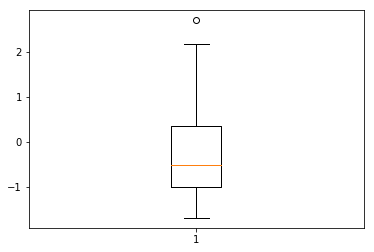

In [30]:
plt.boxplot(pca_df2.PC2)
Q1 = pca_df2.PC2.quantile(0.05)
Q3 = pca_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pca_df2 = pca_df2[(pca_df2.PC2 >= Q1) & (pca_df2.PC2 <= Q3)]

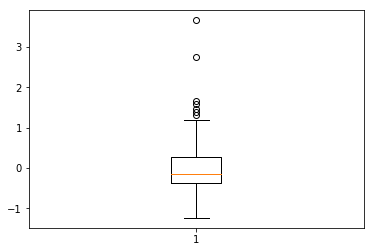

In [31]:
plt.boxplot(pca_df2.PC3)
Q1 = pca_df2.PC3.quantile(0.05)
Q3 = pca_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
pca_df3 = pca_df2[(pca_df2.PC3 >= Q1 ) & (pca_df2.PC3 <= Q3)]

In [32]:
#Rechecking the data after performing outlier analysis
pca_df2.shape

(133, 4)

We notice that the outliers have been removed, initially we had 167 entries now it has been reduced to 133 entries

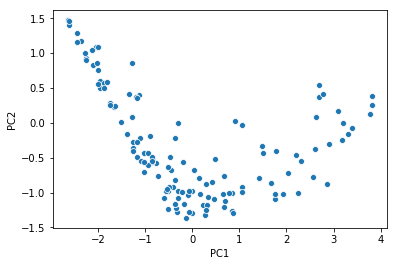

In [33]:
# Checking the spread of the dataset
sns.scatterplot(x='PC1',y='PC2',data=pca_df2)

## 3. Clustering

As we have checked previously the dataset has similar magnitude. Hence no further standardisation is necessary.
Proceeding to calculating the Hopkins statistic to ensure that the data is good for clustering.


In [34]:
# Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
# Checking the Hopkins measure
hopkins(pca_df2.drop(['country'],axis=1))

0.8587781463355447

In [36]:
#0.85 is a good Hopkins score. Hence the data is suitable for clustering
# Performing standardisation again
pca_df3 = pca_df2
dat3_1 = standard_scaler.fit_transform(pca_df3.drop(['country'],axis=1))

### K-means Clustering

In [37]:
# Checking the silhouette score first to identify the ideal number of clusters
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

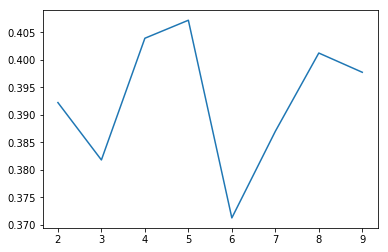

In [38]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

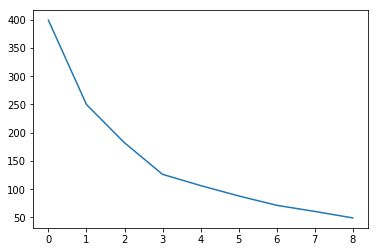

In [39]:
#The sihouette score reaches a peak at around 5 clusters indicating that it might be the ideal number of clusters.
# Let's use the elbow curve method also to identify the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [40]:
# A distinct elbow is formed at around 3-7 clusters
# K-means with k=5 clusters
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
dat4=pca_df3
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus5.labels_)], axis=1)
dat_km.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']
dat_km.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,2
1,Algeria,-0.457626,-0.673301,0.961867,4
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,0
3,Argentina,0.037197,-0.680889,1.466963,4
4,Armenia,-0.332692,-1.274517,0.176636,0


In [42]:
dat_km['ClusterID'].value_counts()

0    64
1    27
2    23
4    11
3     8
Name: ClusterID, dtype: int64

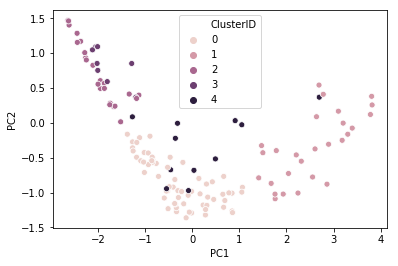

In [43]:
# Each cluster has a good number of countries associated with it (at least 5% of the dataset under consideration)
# Visualising the clusters further
# Visualising the clusters on the original principal components
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

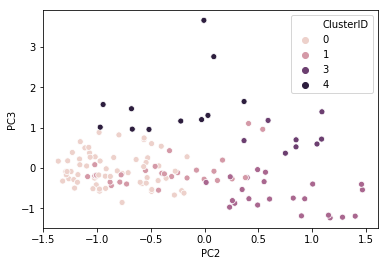

In [44]:
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',data=dat_km)

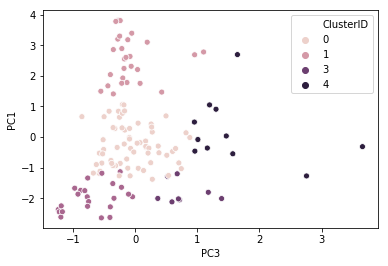

In [45]:
sns.scatterplot(x='PC3',y='PC1',hue='ClusterID',data=dat_km)

One observation,even though some distinct clusters are being formed, some are not so good as others.


In [46]:
# Creating the cluster means with respect to the various variables mentioned in the question and plot and see how they are related
dat5=pd.merge(data,dat_km,on='country')
dat6=dat5[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
clu_chi = 	pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_exp= 	pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
clu_imp = 	pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
clu_hea = 	pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
clu_inc = 	pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clu_inf = 	pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())         
clu_lif = 	pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
clu_tot = 	pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = 	pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())

df = pd.concat([pd.Series([0,1,2,3,4]),clu_chi,clu_exp,clu_imp,clu_hea,clu_inc,clu_inf,clu_lif,clu_tot,clu_gdpp], axis=1)
df.columns = ["ClusterID", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df

,ClusterID,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,23.989063,2590.283258,2839.121580,371.061256,10722.968750,5.913453,72.303125,2.341406,5751.281250
1,1,5.322222,14504.025926,13650.455556,3249.133704,37170.370370,2.204556,79.777778,1.749259,34696.296296
2,2,76.430435,485.824643,714.944348,114.228113,3166.086957,5.575000,59.991304,4.516087,1521.130435
3,3,66.525000,1364.012500,966.090000,170.390000,6171.250000,19.887500,65.725000,4.827500,3111.250000
4,4,17.409091,6261.828182,3723.410909,499.933545,27524.545455,22.181818,74.145455,2.458182,12301.818182


We observe that Child mortality, Income, Inflation and GDP per capita are good predictors for the development of a country. On cross-checking with the original Principal components that we drew, these 4 components had good scores. Hence we can say that they are a good source of information for the Clustering Process.Further visualising the clusters along these.

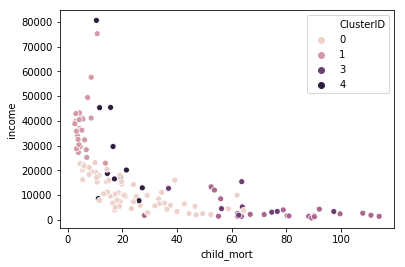

In [47]:
#Along child-mortality and income
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',data=dat6)

In [50]:
#Analysing those countries clusters and trying to deduce whether clustering worked well or not
dat6[dat6['ClusterID']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
2,Antigua and Barbuda,10.3,5551.00000,7185.800000,735.6600,19100,1.440,76.8,2.13,12200,0
4,Armenia,18.1,669.76000,1458.660000,141.6800,6700,7.770,73.3,1.69,3220,0
7,Azerbaijan,39.2,3171.12000,1208.880000,343.3920,16000,13.800,69.1,1.92,5840,0
10,Bangladesh,49.4,121.28000,165.244000,26.6816,2440,7.140,70.4,2.33,758,0
11,Barbados,14.2,6320.00000,7792.000000,1275.2000,15300,0.321,76.7,1.78,16000,0
12,Belarus,5.5,3099.42000,3889.350000,338.2830,16200,15.100,70.4,1.49,6030,0
13,Belize,18.8,2525.88000,2495.500000,225.6800,7880,1.140,71.4,2.71,4340,0
15,Bhutan,42.7,926.50000,1541.260000,113.3600,6420,5.990,72.1,2.38,2180,0
16,Bolivia,46.6,815.76000,679.140000,95.8320,5410,8.780,71.6,3.20,1980,0
18,Brazil,19.8,1198.40000,1321.600000,1009.1200,14500,8.410,74.2,1.80,11200,0


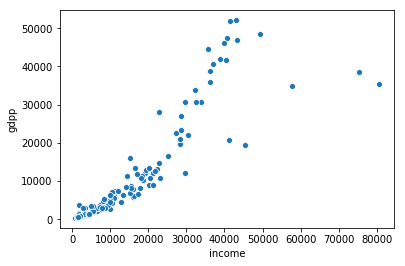

In [49]:
#K-means has done a satisfactory job here. Consider a different approach and make clusters only on the basis of these
sns.scatterplot(x='income',y='gdpp',data=dat6)

###  From the clusters it is observed that cluster 2 and 4 have pretty low values of the 4 indicators that we chose. Hence these are the countries that needs focus.

## Hierarchical Clustering
Checking if hierarchical clustering helps in any better way from K-means clustering

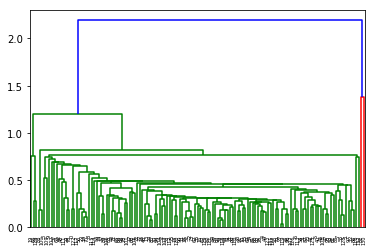

In [51]:
# single linkage procedure
mergings = linkage(dat3_1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

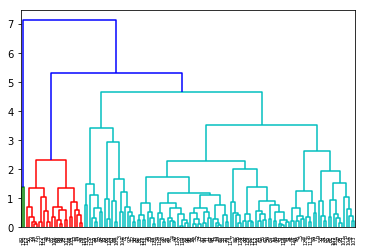

In [52]:
# Result are not that revealing
# Using Complete linkage method
mergings = linkage(dat3_1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [53]:
# We see some good clusters here.Let's see if eliminating the barriers create any effects or not
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
dat3_hc = pd.concat([pca_df3, clusterCut], axis=1)
dat3_hc.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']

In [54]:
dat3_hc.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2
3,Argentina,0.037197,-0.680889,1.466963,1
4,Armenia,-0.332692,-1.274517,0.176636,2


In [55]:
dat7=pd.merge(data,dat3_hc,on='country')
dat8=dat7[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
dat8.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,0
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,2
3,Argentina,14.5,1946.70,1648.000,834.3000,18700,20.90,75.8,2.37,10300,1
4,Armenia,18.1,669.76,1458.660,141.6800,6700,7.77,73.3,1.69,3220,2


In [56]:
dat8['ClusterID'].value_counts()

2    61
3    26
0    23
1    21
4     2
Name: ClusterID, dtype: int64

In [57]:
#Cluster 4 doesn't have enough amount of clusters. Seeing if other clusters are good or not
dat8[dat8['ClusterID']==2]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
2,Antigua and Barbuda,10.3,5551.00000,7185.800000,735.6600,19100,1.440,76.8,2.13,12200,2
4,Armenia,18.1,669.76000,1458.660000,141.6800,6700,7.770,73.3,1.69,3220,2
7,Azerbaijan,39.2,3171.12000,1208.880000,343.3920,16000,13.800,69.1,1.92,5840,2
10,Bangladesh,49.4,121.28000,165.244000,26.6816,2440,7.140,70.4,2.33,758,2
11,Barbados,14.2,6320.00000,7792.000000,1275.2000,15300,0.321,76.7,1.78,16000,2
13,Belize,18.8,2525.88000,2495.500000,225.6800,7880,1.140,71.4,2.71,4340,2
15,Bhutan,42.7,926.50000,1541.260000,113.3600,6420,5.990,72.1,2.38,2180,2
16,Bolivia,46.6,815.76000,679.140000,95.8320,5410,8.780,71.6,3.20,1980,2
18,Brazil,19.8,1198.40000,1321.600000,1009.1200,14500,8.410,74.2,1.80,11200,2
20,Bulgaria,10.8,3433.68000,3625.200000,469.9080,15300,1.110,73.9,1.57,6840,2


In [58]:
dat8[dat8['ClusterID']==3]
#this would be the cluster that we need to focus on

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
5,Australia,4.8,10276.2,10847.1,4530.87,41400,1.160,82.0,1.93,51900,3
6,Austria,4.3,24059.7,22418.2,5159.00,43200,0.873,80.5,1.44,46900,3
8,Bahamas,13.8,9800.0,12236.0,2209.20,22900,-0.393,73.8,1.86,28000,3
9,Bahrain,8.6,14386.5,10536.3,1028.79,41100,7.440,76.0,2.16,20700,3
23,Canada,5.6,13793.4,14694.0,5356.20,40700,2.870,81.3,1.63,47400,3
31,Cyprus,3.6,15461.6,17710.0,1838.76,33900,2.010,79.9,1.42,30800,3
32,Czech Republic,3.4,13068.0,12454.2,1560.24,28300,-1.430,77.5,1.51,19800,3
40,Finland,3.0,17879.4,17278.8,4134.90,39800,0.351,80.0,1.87,46200,3
41,France,4.2,10880.8,11408.6,4831.40,36900,1.050,81.4,2.03,40600,3
45,Germany,4.2,17681.4,15507.8,4848.80,40400,0.758,80.1,1.39,41800,3


In [59]:
dat8[dat8['ClusterID']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.440,56.2,5.82,553,0
14,Benin,111.0,180.4040,281.976,31.0780,1820,0.885,61.8,5.36,758,0
17,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.920,57.1,2.88,6350,0
22,Cameroon,108.0,290.8200,353.700,67.2030,2660,1.910,57.3,5.11,1310,0
28,Comoros,88.2,126.8850,397.573,34.6819,1410,3.870,65.9,4.75,769,0
37,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.600,61.7,4.61,482,0
43,Gambia,80.3,133.7560,239.974,31.9778,1660,4.300,65.5,5.71,562,0
50,Guinea-Bissau,114.0,81.5030,192.544,46.4950,1390,2.970,55.6,5.05,547,0
64,Kenya,62.2,200.1690,324.912,45.9325,2480,2.090,62.8,4.37,967,0
65,Kiribati,62.7,198.1700,1190.510,168.3700,1730,1.520,60.7,3.84,1490,0


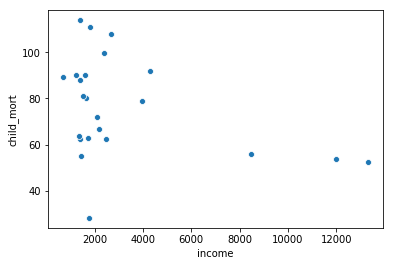

In [60]:
#Let's visualise the clusters here. We don't see the countries properly clustered here. Therefore we don't create cluster
datp=dat8[dat8['ClusterID']==0]
sns.scatterplot(x='income',y='child_mort',data=datp)

#### Final result : We use the clusters formed during K-means clustering to find the countries that we require since Hierarchical clustering is not showing proper clusters here. For K-means part, we got Cluster 2 and 4 might be the ones which has a proper need of aid.

In [62]:
# finding the list of countries which needs to be focussed on
# the upper limit that we got from clustering is 1700
# filtering the entire dataset with 1700 as the cut-off limit for gdpp
fin2 = data[data['gdpp']<=1700]

In [63]:
fin2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440,7.140,70.4,2.33,758
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231


In [64]:
len(fin2)

48

In [65]:
#So we got 48 countries here. We can create further sub categories by taking another good clustering indicator 
#Let's use the describe function to see how the variables are aligned now
fin2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,84.808333,242.988282,53.166544,389.688794,2209.229167,8.849688,60.789583,4.552500,847.583333
std,37.864382,208.411190,36.338142,306.718665,1134.428833,5.849055,7.282776,1.382764,384.444824
min,17.200000,1.076920,12.821200,0.651092,609.000000,0.885000,32.100000,1.270000,231.000000
25%,61.350000,101.630250,31.079500,175.909500,1390.000000,4.080000,57.175000,3.465000,551.500000
50%,82.050000,150.912000,44.388600,280.956000,1900.000000,8.215000,61.250000,4.875000,758.000000
75%,108.250000,388.087500,60.501250,450.765000,2857.500000,12.150000,66.125000,5.370000,1205.000000
max,208.000000,943.200000,190.710000,1279.550000,4490.000000,23.600000,73.100000,7.490000,1630.000000


In [66]:
#From the clustering process we got child_mortality to be at least 76 for the most downtrodden cluster
#Let's see how many countries lie within that range
len(fin2[fin2['child_mort']>=76])

28

In [67]:
#Ok so we got 28 countries now. We can stop here or take one more indicator and find the final list
#Here we are taking income as the next one, where around 3200 was the income mean of the downtrodden cluster
fin3=fin2[fin2['child_mort']>=76]
fin4=fin3[fin3['income']<3200]
len(fin4)

23

In [68]:
#We've got 23 countries now, let's use the describe function to see how they're aligned again
fin4.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,113.743478,165.144704,41.870378,292.629174,1444.913043,7.125435,56.065217,5.463478,627.173913
std,30.255681,140.898936,23.154120,222.532254,587.515796,5.428622,6.853042,0.953232,288.989407
min,80.300000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000
25%,90.400000,79.379500,30.663050,170.185000,974.000000,3.420000,55.300000,5.080000,432.500000
50%,109.000000,126.885000,37.332000,248.297000,1410.000000,5.450000,57.300000,5.340000,562.000000
75%,119.500000,188.290000,46.119600,328.251000,1740.000000,10.020000,58.750000,6.010000,733.000000
max,208.000000,617.320000,129.870000,1181.700000,2690.000000,20.800000,65.900000,7.490000,1310.000000


In [69]:
#The final list of countries 
fin4

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.390,56.3,5.27,1220


Therefore the major focus should be given to the countries mentioned above